In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
import random
from PIL import Image
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms

In [2]:
path = "C:\\Users\\user\\Desktop\\Python2\\Lab2\\set\\dataset.csv"
dframe = pd.read_csv(
    path, delimiter=",", names=["Absolute path", "Relative path", "Class"]
)
img_list = dframe["Absolute path"].tolist()
random.shuffle(img_list)
print(img_list[:7]) 

['C:\\Users\\user\\Desktop\\Python2\\dataset\\dog\\0713.jpg', 'C:\\Users\\user\\Desktop\\Python2\\dataset\\dog\\0314.jpg', 'C:\\Users\\user\\Desktop\\Python2\\dataset\\cat\\0119.jpg', 'C:\\Users\\user\\Desktop\\Python2\\dataset\\dog\\0437.jpg', 'C:\\Users\\user\\Desktop\\Python2\\dataset\\cat\\0514.jpg', 'C:\\Users\\user\\Desktop\\Python2\\dataset\\dog\\0483.jpg', 'C:\\Users\\user\\Desktop\\Python2\\dataset\\dog\\0983.jpg']


In [4]:
img_label=[]
for i in range(len(img_list)):
    img_label.append(os.path.basename(os.path.dirname(img_list[i])))
print(img_label[:5])

['dog', 'dog', 'cat', 'dog', 'cat']


In [19]:
training_list = img_list[0 : int(len(img_list) * 0.8)]
testing_list = img_list[int(len(img_list) * 0.8) : int(len(img_list) * 0.9)]
validation_list = img_list[int(len(img_list) * 0.9) : int(len(img_list))] 
print(len(training_list ), len(testing_list), len(validation_list))

1612 202 202


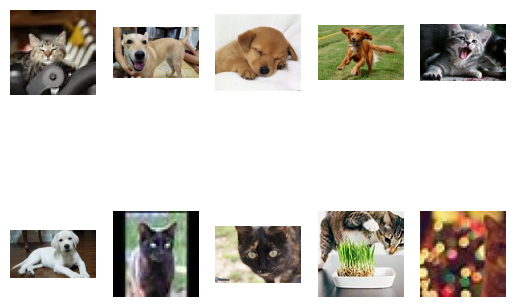

In [25]:
random_idx = np.random.randint(1,len(img_list),size=10)
fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i) 
    img = Image.open(img_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off') 
plt.show()

In [ ]:
class dataset(torch.utils.data.Dataset):  
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    # dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    # load an one of images
    def __getitem__(self, idx):
        img_label = []
        for i in range(len(self.file_list)):
            img_label.append(os.path.basename(
                os.path.dirname(self.file_list[i])))
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        label = img_label[idx]
        if label == "cat":
            label = 0
        elif label == "dog":
            label = 1
        return img_transformed, label